In [3]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

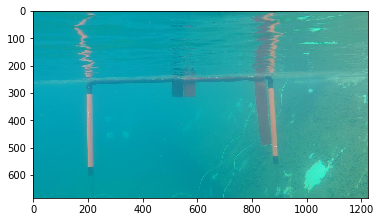

In [66]:
#Now how do i get the calibration parameters of the camera that recorded the video?
#OKAY for now let's just assume no distortions or whatsoever, 
#let's check for the suitable color spaces and thresholds
img21=mpimg.imread('/home/workspace/CarND-Advanced-Lane-Lines/min00:21.jpg')
img03=mpimg.imread('/home/workspace/CarND-Advanced-Lane-Lines/min00:03.jpg')
img11=mpimg.imread('/home/workspace/CarND-Advanced-Lane-Lines/min00:11.jpg')


testImage=img21
plt.imshow(testImage)


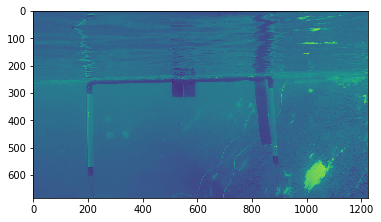

In [6]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

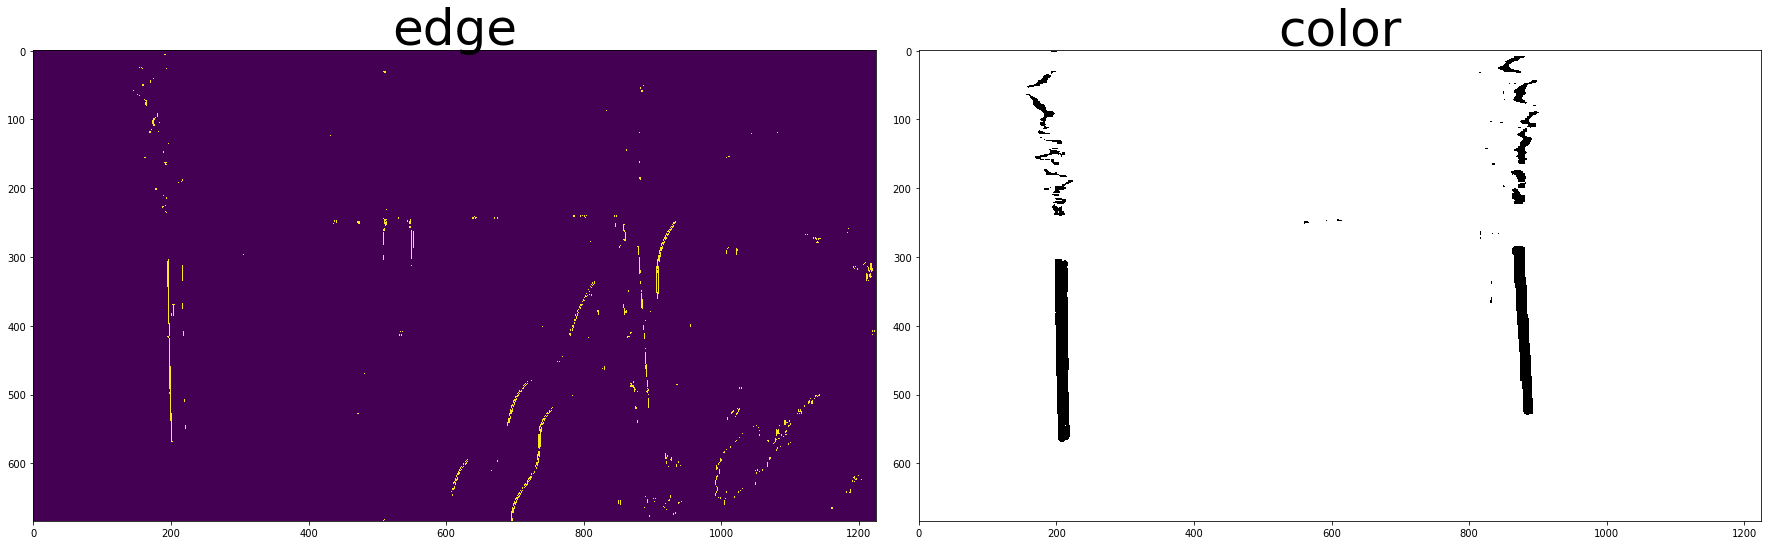

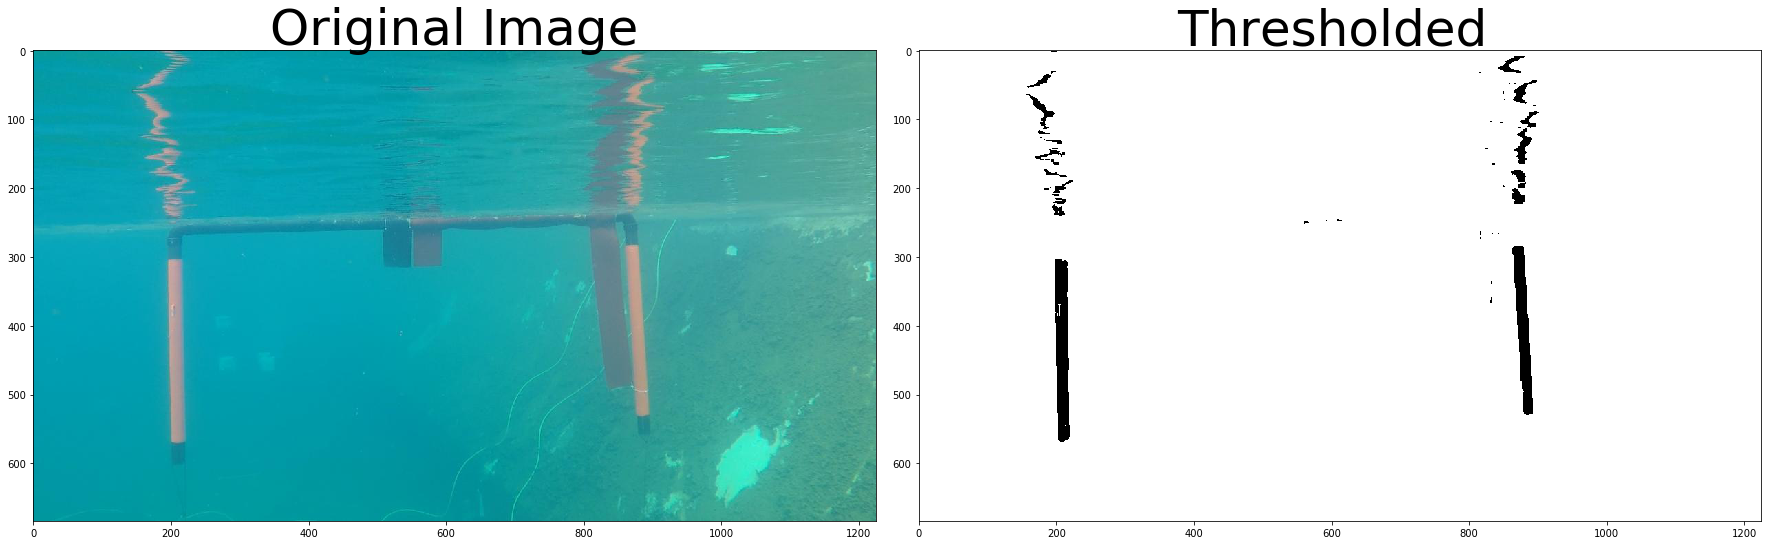

In [82]:
def get_abs_mag_dir_binary(image, abs_thresh=(0, 255),mag_thresh=(0, 255),dir_thresh=(0, np.pi/2),sobel_kernel=3):
    
    
    ###First The magnitude part
    
    #First grayScale
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    
    #Get the "derivative" in the x direction
    sobelx=cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely=cv2.Sobel(gray,cv2.CV_64F, 0,1,ksize=sobel_kernel)
    
    #idk if getting the mag is better or if getting sobelx only is better, but will try out everything, so let's see 
    mag= np.sqrt((sobelx**2)+(sobely**2))
    magScaled= np.uint8(mag*255/np.max(mag))
    
    magBinaryOutput= np.zeros_like(magScaled)
    magBinaryOutput[(magScaled>=mag_thresh[0]) & (magScaled<=mag_thresh[1])]=1
    
    
    ##Second For the Direction part
    
    sobelx_abs=np.absolute(sobelx)
    sobely_abs=np.absolute(sobely)  
    
    
    direction=np.arctan2(sobely_abs,sobelx_abs) 
    
    dirBinaryOutput=np.zeros_like(direction)
    dirBinaryOutput[(direction>=dir_thresh[0]) & (direction<=dir_thresh[1])]=1 
    
    #Finally for the ABSOLUTE PART
    abs_scaled =np.uint8(255*sobelx_abs/np.max(sobelx_abs)) 
    absBinary= np.zeros_like(abs_scaled)
    absBinary[(abs_scaled>= abs_thresh[0]) & (abs_scaled <= abs_thresh[1])] =1
    
    #NOW COMBINE
    combined = np.zeros_like(dirBinaryOutput)
    #combined[(absBinary == 1) |((magBinaryOutput == 1) & (dirBinaryOutput == 1))] = 1
    #combined[(absBinary == 1) &(  (dirBinaryOutput == 1))] = 1
    
    # as i can see my best result obtained without the direction part, so let's just ignore it
    # (of course for better code speed efficiency i should comment or delete it)

    combined[(absBinary == 1) |((magBinaryOutput == 1) )] = 1


    
    
    return absBinary



#Now create a function that returns and image transformed into HSL domain with the S only. (After testing various combinations)
def get_s_binary(img, s_thresh=(0, 255)):
    
    hsv=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    #I remember from the quizes and my trials that the S channel was the best in different lighting conditions so..
    h=hsv[:,:,0]
    s_thresh= (35,100)
    binary_output=np.zeros_like(h)
    binary_output[(h>s_thresh[0]) & (h<=s_thresh[1])]=1 
    
    s=hsv[:,:,0]
    blue_thres= (,)
    out2=np.zeros_like(s)
    out2[(h>blue_thresh[0]) & (h<=blue_thresh[1])]=1
    
    
    plt.imshow(out2)
    
    
#     lower_orange = np.array([214,  24, 43])
#     upper_orange = np.array([260, 80, 43])
    
#     mask = cv2.inRange(hsv, lower_orange, upper_orange)

#    return mask
    return binary_output

#TESTING

outt1=get_abs_mag_dir_binary(testImage,abs_thresh=(70,200),mag_thresh=(100, 255),dir_thresh=(0, 1.5))
#plt.imshow(outt)

outt2=get_s_binary(testImage,s_thresh=(15,30))

f, (ax3, ax4) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax3.imshow(outt1)
ax3.set_title('edge', fontsize=50)
ax4.imshow(outt2, cmap='gray')
ax4.set_title('color', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)




#Now let's define a function that transforms each frame/image into my combined binary frame/image
def getCombinedBinary(image,Abs_Thresh=(15,100),Mag_Thresh=(100, 255),Dir_Thresh=(0.7, 1.3),S_Thresh=(170,255),Sobel_Kernel=3):
   
    outt1=get_abs_mag_dir_binary(image,abs_thresh=Abs_Thresh,mag_thresh=Mag_Thresh,dir_thresh=Dir_Thresh,sobel_kernel=Sobel_Kernel)
    outt2=get_s_binary(image,s_thresh=S_Thresh)
    
    combined = np.zeros_like(outt2)
    combined[((outt1 == 1) | (outt2 == 1))] = 1

    return combined
    
    
    
"""
#TESTING
#FIRST FIX THE IMAGE DISTORTION
image_=cv2.undistort(testImages[5],mtx,dist,None,mtx)

"""
outt=getCombinedBinary(testImage,Abs_Thresh=(70,200),Mag_Thresh=(100, 255),Dir_Thresh=(0, 1.5),S_Thresh=(35,100))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(testImage)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(outt, cmap='gray')
ax2.set_title('Thresholded ', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

   
